# Car Price Prediction

In [1]:
# Importing libraries :
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Dataset :
df = pd.read_csv("car dataset.csv")

In [3]:
# Top 5 Records :
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Shape of dataset :
df.shape

(301, 9)

In [5]:
df.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [6]:
# Description of dataset :
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Data-types of each columns :
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
# Cheaking missing values :
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(df["Seller_Type"].unique())

['Dealer' 'Individual']


In [10]:
print(df["Transmission"].unique())

['Manual' 'Automatic']


In [11]:
print(df["Owner"].unique())

[0 1 3]


In [12]:
print(df["Fuel_Type"].unique())

['Petrol' 'Diesel' 'CNG']


In [13]:
# Columns :
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
# Taking only Importing feature :
dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# Creating Current Year Column :
dataset['Current_Year'] = 2020

In [17]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [18]:
# Creating New Column :
dataset['no_of_years'] = dataset['Current_Year']-dataset['Year']

In [19]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [20]:
# Dropping Unnecessary Columns :
dataset.drop(['Year', 'Current_Year'],axis =1, inplace = True)

In [21]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [22]:
# OneHotCoding :
dataset = pd.get_dummies(dataset,drop_first = True)

In [23]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [24]:
# Corelation :
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


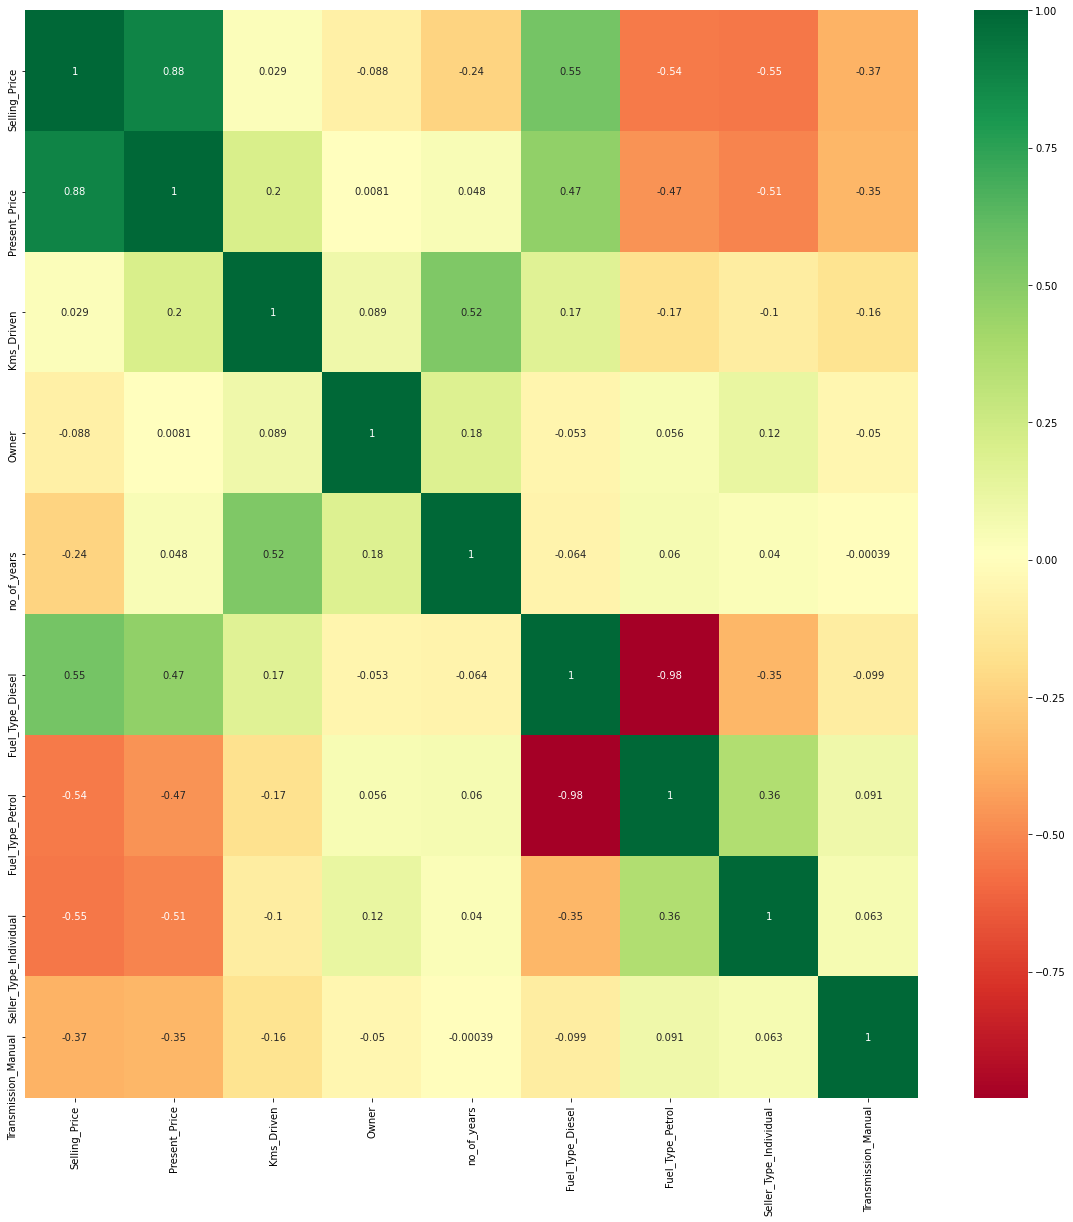

In [25]:
#plotting heat map :
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [27]:
# Independant and dependant features :
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [28]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [30]:
### feature importance :
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[3.56050575e-01 4.11249248e-02 3.51406891e-04 7.92827990e-02
 2.31435873e-01 1.26843668e-02 1.32917897e-01 1.46152157e-01]


<function matplotlib.pyplot.show(*args, **kw)>

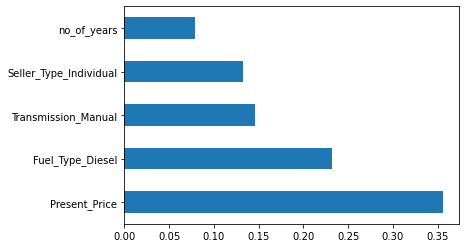

In [32]:
# Plotting graph of feature importance for better visualization :
feat_importances = pd.Series(model.feature_importances_, index =X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show

In [33]:
# as the number of features are low we wont remove any features as such

In [34]:
# Train Test Split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [36]:
# RandomForestRegressor :
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [37]:
### Hyperparameters
# no of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
#print(n_estimators)
# no of features
max_features = ['auto', 'sqrt']
# max no of levels i.e. depth
max_depth = [int(x) for x in np.linspace(5, 30,num = 60)]
# min no of samples req to split a node
min_samples_split = [2,5,10,15,100]
# min no of samples req at each leaf node
min_samples_leaf = [1,2,5,10]


In [38]:
random_grid = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
# RandomizedSearchCV :
from sklearn.model_selection import RandomizedSearchCV

In [40]:
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state=42, n_jobs= 1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.0s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.0s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=18 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=18, total=   1.3s
[CV] n_estimators=400, min_samples_split=5, min_sa

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=300, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8,
                                                      8, 9, 9, 10, 10, 10, 11,
                                                      11, 12, 12, 13, 13, 13,
                                                      14, 14, 15, 15, 16, 16,
                                                      16, 17, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                         

In [42]:
predictions = rf_random.predict(X_test)

In [43]:
predictions

array([ 0.73603   ,  5.41612   ,  0.27574   ,  2.93130167,  0.82896   ,
        1.04804   ,  1.09962   ,  0.3185    ,  6.01383333,  5.18144861,
        4.08184713,  0.73142   ,  7.68315959,  6.4663    ,  4.89731583,
        0.56978219,  5.93216667,  0.58773   ,  0.44620646,  0.73165174,
       11.4381    ,  0.542135  ,  1.29059333,  7.65291792,  4.373625  ,
        4.28076778,  0.44693833,  8.64773   ,  0.49341571,  0.82598   ,
        4.82026   ,  2.79035   ,  8.28106   ,  0.65161569,  0.66491917,
        1.07134333,  5.2189    ,  0.37028267,  1.10688   ,  0.50899531,
        0.30468   ,  7.64081048,  0.30182   ,  7.95422   , 22.21704   ,
        4.58640353,  5.27741881,  1.07956   ,  5.42612667,  8.72782333,
        6.10699238,  5.8091    ,  0.5082936 ,  0.370635  , 12.94364   ,
        8.7447    ,  4.99286667,  4.64001484,  5.96734   ,  0.55781905,
        7.30383   ])

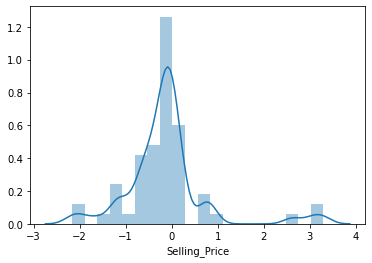

In [44]:
sns.distplot(y_test-predictions)

In [45]:
import pickle
# make a pkl file and open in write mode
file = open('Random_forest_regression_model.pkl','wb')
#dump information to that file
pickle.dump(rf_random,file)